# step1: Data Understanding and Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [3]:
data=pd.read_csv("C:/Users/Admin/Downloads/NovaTrade_Brasil_Demand.csv",delimiter=";")

In [4]:
novatrade=pd.DataFrame(data)

In [5]:
novatrade

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


In [6]:
novatrade.isnull().sum()

Week of the month (first week, second, third, fourth or fifth week    0
Day of the week (Monday to Friday)                                    0
Non-urgent order                                                      0
Urgent order                                                          0
Order type A                                                          0
Order type B                                                          0
Order type C                                                          0
Fiscal sector orders                                                  0
Orders from the traffic controller sector                             0
Banking orders (1)                                                    0
Banking orders (2)                                                    0
Banking orders (3)                                                    0
Target (Total orders)                                                 0
dtype: int64

In [7]:
novatrade.duplicated().sum()

0

In [8]:
#calculate the discriptive stats
novatrade.describe()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.016667,4.033333,172.554933,118.920850,52.112217,109.229850,139.531250,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,1.282102,1.401775,69.505788,27.170929,18.829911,50.741388,41.442932,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,1.000000,2.000000,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,2.000000,3.000000,125.348000,100.888000,39.456250,74.916250,113.632250,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,3.000000,4.000000,151.062500,113.114500,47.166500,99.482000,127.990000,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,4.000000,5.000000,194.606500,132.108250,58.463750,132.171000,160.107500,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,5.000000,6.000000,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


In [9]:
novatrade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Week of the month (first week, second, third, fourth or fifth week  60 non-null     int64  
 1   Day of the week (Monday to Friday)                                  60 non-null     int64  
 2   Non-urgent order                                                    60 non-null     float64
 3   Urgent order                                                        60 non-null     float64
 4   Order type A                                                        60 non-null     float64
 5   Order type B                                                        60 non-null     float64
 6   Order type C                                                        60 non-null     float64
 7   Fiscal sector order

In [10]:

corr_mx=novatrade.corr()
corr_mx

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
"Week of the month (first week, second, third, fourth or fifth week",1.000000,-0.207791,0.243472,0.118258,0.256115,0.312767,-0.041582,0.000964,-0.194088,0.392310,0.147086,-0.157059,0.211709
Day of the week (Monday to Friday),-0.207791,1.000000,-0.416331,-0.517106,-0.068894,-0.376512,-0.448823,-0.132397,-0.339485,-0.051815,-0.577035,-0.012251,-0.435286
Non-urgent order,0.243472,-0.416331,1.000000,0.564796,0.561397,0.827186,0.752627,-0.057150,0.246937,0.732357,0.788192,0.132857,0.934518
Urgent order,0.118258,-0.517106,0.564796,1.000000,0.412817,0.508929,0.767155,-0.011452,0.242268,0.230618,0.660868,0.031260,0.729785
Order type A,0.256115,-0.068894,0.561397,0.412817,1.000000,0.438734,0.218651,0.064525,-0.151762,0.675328,0.294374,0.230369,0.559735
Order type B,0.312767,-0.376512,0.827186,0.508929,0.438734,1.000000,0.523598,-0.122432,0.127111,0.592845,0.713674,0.067325,0.900673
Order type C,-0.041582,-0.448823,0.752627,0.767155,0.218651,0.523598,1.000000,0.007906,0.442404,0.330186,0.718739,0.031053,0.804984
Fiscal sector orders,0.000964,-0.132397,-0.057150,-0.011452,0.064525,-0.122432,0.007906,1.000000,0.197670,0.003523,-0.055066,0.294567,-0.052116
Orders from the traffic controller sector,-0.194088,-0.339485,0.246937,0.242268,-0.151762,0.127111,0.442404,0.197670,1.000000,-0.162309,0.240450,0.231614,0.244712
Banking orders (1),0.392310,-0.051815,0.732357,0.230618,0.675328,0.592845,0.330186,0.003523,-0.162309,1.000000,0.262905,0.221335,0.630365


In [11]:
novatrade.shape

(60, 13)

In [12]:
novatrade.columns

Index(['Week of the month (first week, second, third, fourth or fifth week',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

# Step 2: EDA(exploratory Data Analysis)

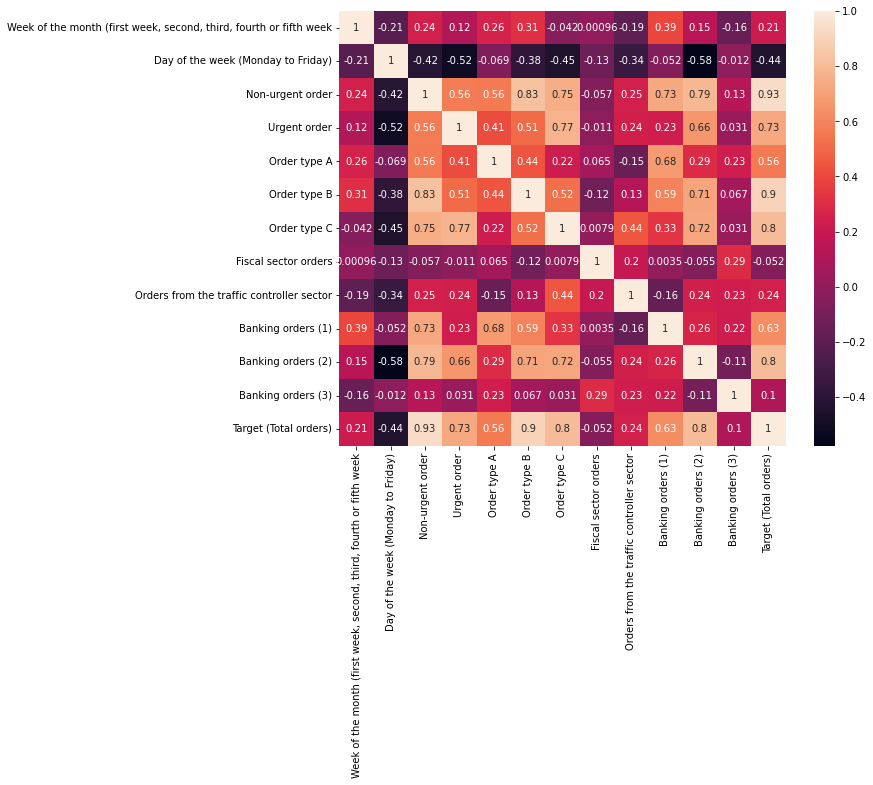

In [13]:
corr_mx=novatrade.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mx,annot=True)
plt.show()

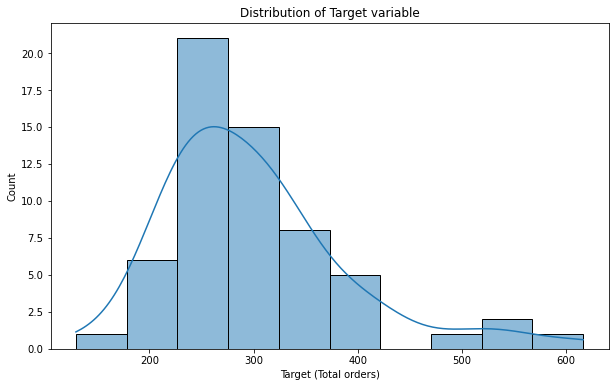

In [14]:
# Relationship between 'Order type A' and 'Target (Total orders)'
plt.figure(figsize=(10, 6))
sns.histplot(x='Target (Total orders)',kde=True, data=novatrade)
plt.title('Distribution of Target variable')

plt.show()

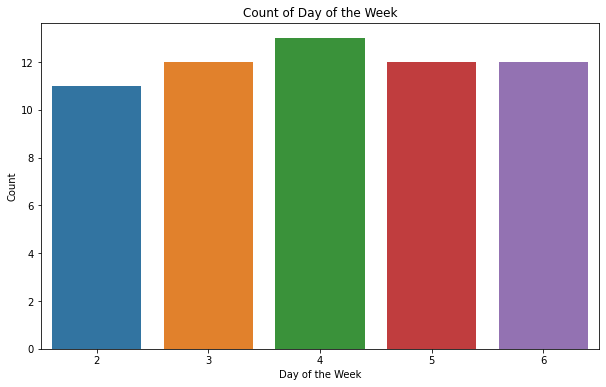

In [15]:
# Plotting the count of 'Day of the week'
plt.figure(figsize=(10, 6))
sns.countplot(x='Day of the week (Monday to Friday)', data=novatrade)
plt.title('Count of Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

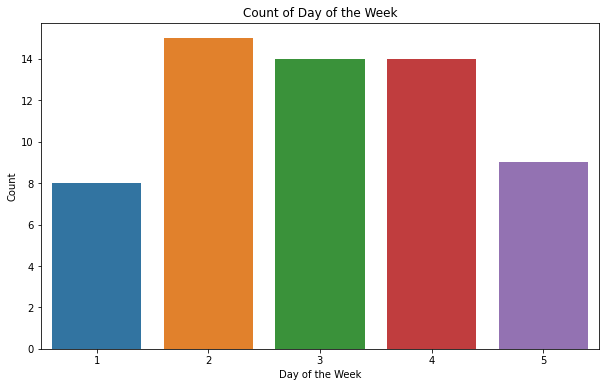

In [16]:
# Plotting the count of 'Day of the week'
plt.figure(figsize=(10, 6))
sns.countplot(x='Week of the month (first week, second, third, fourth or fifth week', data=novatrade)
plt.title('Count of Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

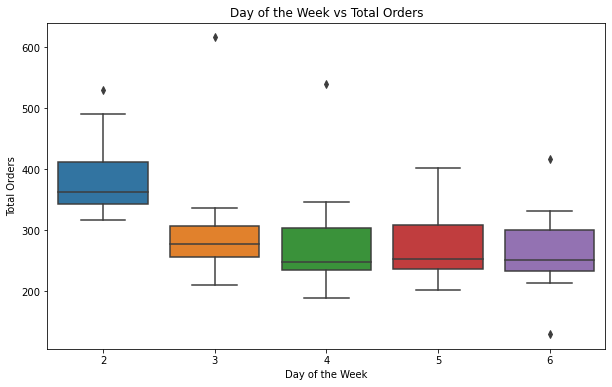

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day of the week (Monday to Friday)', y='Target (Total orders)', data=novatrade)
plt.title('Day of the Week vs Total Orders')
plt.xlabel('Day of the Week')
plt.ylabel('Total Orders')
plt.show()

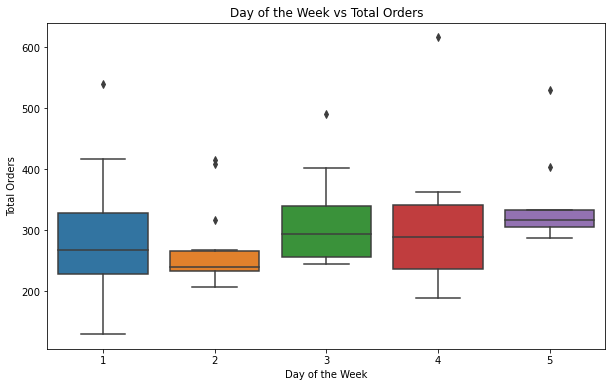

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Week of the month (first week, second, third, fourth or fifth week', y='Target (Total orders)', data=novatrade)
plt.title('Day of the Week vs Total Orders')
plt.xlabel('Day of the Week')
plt.ylabel('Total Orders')
plt.show()

In [49]:
novatrade.columns

Index(['Week of the month (first week, second, third, fourth or fifth week',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

# step 3. Statistical Analysis

In [54]:
import scipy.stats as stats

# One-way ANOVA for 'Week of the month' and 'Total orders'
anova_result = stats.f_oneway(
    novatrade[novatrade['Week of the month (first week, second, third, fourth or fifth week'] == 1]['Target (Total orders)'],
    novatrade[novatrade['Week of the month (first week, second, third, fourth or fifth week'] == 2]['Target (Total orders)'],
    novatrade[novatrade['Week of the month (first week, second, third, fourth or fifth week'] == 3]['Target (Total orders)'],
    novatrade[novatrade['Week of the month (first week, second, third, fourth or fifth week'] == 4]['Target (Total orders)'],
    novatrade[novatrade['Week of the month (first week, second, third, fourth or fifth week'] == 4]['Target (Total orders)']
)
print('ANOVA result for Week of the Month vs Total Orders:', anova_result)


ANOVA result for Week of the Month vs Total Orders: F_onewayResult(statistic=0.49131113395892617, pvalue=0.7420816852469166)


In [55]:
alpha=0.05
if anova_result.pvalue<alpha:
    print('Reject Null Hypothesis: There is a significant difference in the mean total orders across week of the month')
else:
     print(' Fail to Reject Null Hypothesis: There is no significant difference in the mean total orders across week of the month')


 Fail to Reject Null Hypothesis: There is no significant difference in the mean total orders across week of the month


# Step 4: Regression Analysis on multiple algorithm

In [20]:
# Correct way to drop columns and assign to X and Y
X = novatrade.drop(columns=[
    'Target (Total orders)',
    'Week of the month (first week, second, third, fourth or fifth week',
    'Day of the week (Monday to Friday)',
    'Fiscal sector orders',
    'Orders from the traffic controller sector',
    'Banking orders (3)'
])

Y = novatrade['Target (Total orders)']

scaler=StandardScaler()
X_train=scaler.fit_transform(X)
X_test=scaler.fit_transform(X)

# Regression Techniques:

# 1.Multiple  Linear Regression:

In [21]:
from sklearn.linear_model import LinearRegression
def linear_model(X_train,Y_train):
    print("Linear Regression")
    linear_regression=LinearRegression()
    linear_regression.fit(X_train,Y_train)
    return linear_regression
    

# 2.Lasso Regression:

In [22]:
from sklearn.linear_model import Lasso
def lasso_model(X_train,Y_train):
    print("Lasso Regression")
    lasso_regression=Lasso(alpha=0.8,max_iter=10000)
    lasso_regression.fit(X_train,Y_train)
    return lasso_regression

# 3.Ridge Regression:

In [23]:
from sklearn.linear_model import Ridge
def ridge_model(X_train,Y_train):
    print("Ridge Regression")
    ridge_regression=Ridge(alpha=0.9,max_iter=None)
    ridge_regression.fit(X_train,Y_train)
    return ridge_regression

# 4.Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
def decision_model(X_train,Y_train):
    print("Decision Tree Regression")
    decision_tree_regression=DecisionTreeRegressor(criterion='squared_error', random_state=42)
    decision_tree_regression.fit(X_train,Y_train)
    plt.figure(figsize=(20,10))
    plot_tree(decision_tree_regression, filled=True, feature_names=X_train.columns)
    plt.show()
    return decision_tree_regression

# 5.Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
def random_forest_model(X_train,Y_train):
    print("Random Forest Regression")
    clf=RandomForestRegressor(n_estimators=100,random_state=42)
    clf.fit(X_train,Y_train)
    return clf
    

# 6.XG_Boost Regressor

In [26]:
import xgboost as xgb 
def xg_boost_model(X_train,Y_train):
    print("XG Boost Regression")
    xg_boost=xgb.XGBRegressor(objective='reg:squarederror',random_state=42)
    xg_boost.fit(X_train,Y_train)
    return xg_boost
    

# Step 4: Model Building 

In [27]:
def build_and_train_model(df,target_name,reg_fn):
    X=df.drop(target_name,axis=1)
    Y=df[target_name]
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
    model=reg_fn(X_train,Y_train)
    score=model.score(X_train,Y_train)
    print("Training Score: ",score)
    Y_pred=model.predict(X_test)
    r_score=r2_score(Y_test,Y_pred)
    print("Testing Score: ",r_score)
    return {'model':model,
            
           'X_train':X_train,'Y_train':Y_train,
            'X_test':X_test,'Y_test':Y_test,
            'Y_pred':Y_pred
           }

In [28]:
linear_reg=build_and_train_model(novatrade,'Target (Total orders)',linear_model)

Linear Regression
Training Score:  1.0
Testing Score:  1.0


In [29]:
lasso_reg=build_and_train_model(novatrade,'Target (Total orders)',lasso_model)

Lasso Regression
Training Score:  0.999998183704208
Testing Score:  0.9999882554329987


In [30]:
ridge_reg=build_and_train_model(novatrade,'Target (Total orders)',ridge_model)

Ridge Regression
Training Score:  0.9999999936330083
Testing Score:  0.9999999199325242


Decision Tree Regression


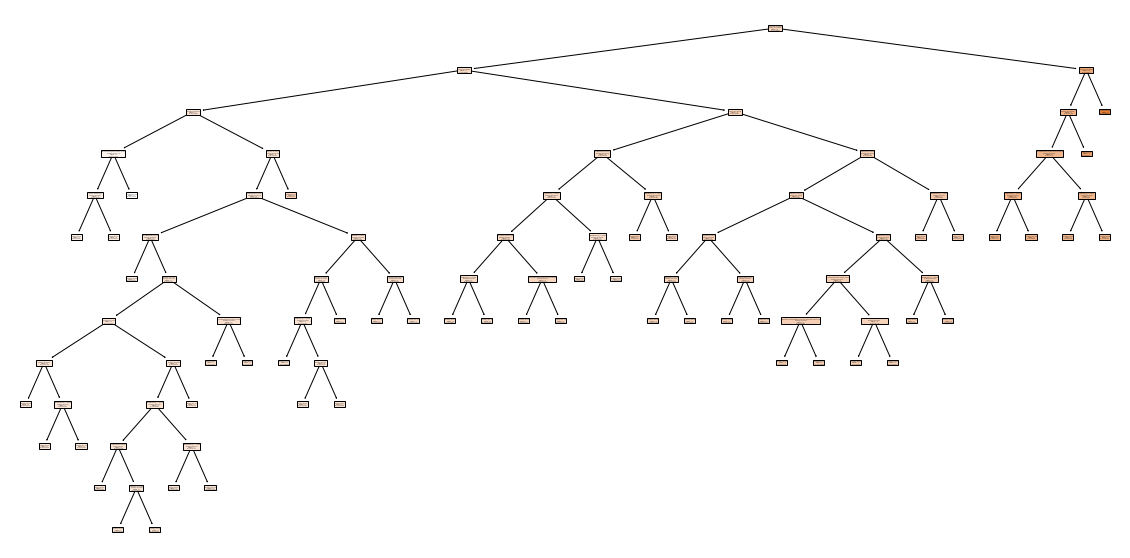

Training Score:  1.0
Testing Score:  0.47899695889204263


In [31]:
decision_tree_reg=build_and_train_model(novatrade,'Target (Total orders)',decision_model)

In [32]:
random_forest_reg=build_and_train_model(novatrade,'Target (Total orders)',random_forest_model)

Random Forest Regression
Training Score:  0.9738446992319157
Testing Score:  0.677421158517971


In [33]:
xg_bosst_reg=build_and_train_model(novatrade,'Target (Total orders)',xg_boost_model)

XG Boost Regression
Training Score:  0.9999999999339884
Testing Score:  0.7821760127020734


###### Step 6: Model Evaluation

In [34]:
#apply model evaluation technique on xg_boost
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)


## Set up parameter grid
parameter_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
xgb_boost=xgb.XGBRegressor(random_state=42)
#perform grid search cv
grid_search=GridSearchCV(estimator=xgb_boost,param_grid=parameter_grid,cv=5,scoring='neg_mean_squared_error',verbose=1)
grid_search.fit(X_train,Y_train)
best_param=grid_search.best_params_
print(f'Best parameter : {best_param}')

best_model=grid_search.best_estimator_
best_pred=best_model.predict(X_test)
best_accuracy=r2_score(Y_test,best_pred)
print(f'best accuracy after grid search is:{best_accuracy}')


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameter : {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.8}
best accuracy after grid search is:0.80673740124353


# Summary
The analysis aimed to build a predictive model for daily demand forecasting using the dataset from NovaTrade Brasil. After performing extensive hyperparameter tuning using grid search, the best model achieved an accuracy of approximately 80.67%. This model can be used to predict daily demand, aiding the logistics company in efficient planning and resource allocation.